# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import seaborn as sns
import datetime
import geopandas as gpd



pd.options.display.max_columns = 999
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Establezco estilo global para los gráficos
sns.set_style('whitegrid')
sns.set_palette('RdYlGn')
sns.set(font_scale=1.2)

# Cargar los csvs como pandas dataframes

In [3]:
robados = pd.read_csv('./curados/para_EDA.csv', parse_dates= ['tramite_fecha', 'fecha_inscripcion_inicial'])
robados.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad
0,DENUNCIA DE ROBO O HURTO,2018-01-17,2000-10-05,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,2000.0,SEDAN 4 P,CHEVROLET,CORSA,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1981.0,ARGENTINA,100
1,DENUNCIA DE ROBO O HURTO,2018-01-03,2007-11-22,LANUS Nº 1,Buenos Aires,Nacional,2007.0,FURGON,PEUGEOT,PARTNER,Privado,Física,VALENTIN ALSINA,BUENOS AIRES,Femenino,1990.0,ARGENTINA,100
2,DENUNCIA DE ROBO O HURTO,2018-01-12,1995-02-01,MAR DEL PLATA Nº 02,Buenos Aires,Nacional,1995.0,SEDAN 4 P,RENAULT,RENAULT 19,Privado,Física,UNIDAD TURISTICA CHAPADMALAL,BUENOS AIRES,Masculino,1986.0,ARGENTINA,100
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1999-09-28,NECOCHEA Nº 1,Buenos Aires,Nacional,1999.0,SEDAN 3 P,RENAULT,CLIO,Privado,Física,NECOCHEA BS.AS.,BUENOS AIRES,No identificado,1964.0,NO IDENTIFICADO,100
4,DENUNCIA DE ROBO O HURTO,2018-01-09,2006-09-07,PILAR Nº 1,Buenos Aires,Nacional,2006.0,FURGON,PEUGEOT,PARTNER,Privado,Física,PTE. DERQUI,BUENOS AIRES,Femenino,1961.0,ARGENTINA,100


In [4]:
# Dividir robados y recuperados
recuperados = robados[robados['tramite_tipo'] == 'COMUNICACIÓN DE RECUPERO']
robados = robados[robados['tramite_tipo'] == 'DENUNCIA DE ROBO O HURTO']

In [5]:
robados.dtypes

tramite_tipo                              object
tramite_fecha                     datetime64[ns]
fecha_inscripcion_inicial         datetime64[ns]
registro_seccional_descripcion            object
registro_seccional_provincia              object
automotor_origen                          object
automotor_anio_modelo                    float64
automotor_tipo_descripcion                object
automotor_marca_descripcion               object
automotor_modelo_descripcion              object
automotor_uso_descripcion                 object
titular_tipo_persona                      object
titular_domicilio_localidad               object
titular_domicilio_provincia               object
titular_genero                            object
titular_anio_nacimiento                  float64
titular_pais_nacimiento                   object
titular_porcentaje_titularidad             int64
dtype: object

# EDA

### Robos por año

In [245]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["anio"] = robados["tramite_fecha"].dt.year

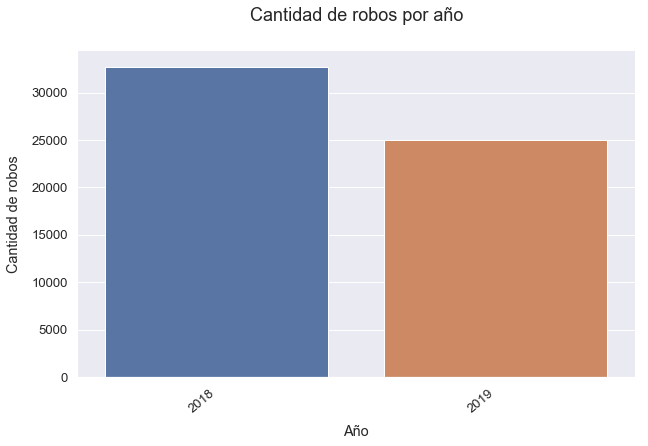

In [246]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="anio", data=robados) #, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Año', labelpad= 10)
plt.ylabel('Cantidad de robos', labelpad= 10)
plt.title("Cantidad de robos por año", pad= 30, size = 18)
sns.despine()

### Robos por mes realtivizado a parque automotor

In [247]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["mes_idx"] = robados["tramite_fecha"].dt.month

In [248]:
# Armo una función que codifique los días de la semana 
def label_month(month_code):
    if (month_code==1):
        return "Enero"
    elif (month_code==2):
        return "Febrero"
    elif (month_code==3):
        return "Marzo"
    elif (month_code==4):
        return "Abril"
    elif (month_code==5):
        return "Mayo"
    elif (month_code==6):
        return "Junio"
    elif (month_code==7):
        return "Julio"
    elif (month_code==8):
        return "Agosto"
    elif (month_code==9):
        return "Septiembre"
    elif (month_code==10):
        return "Octubre"
    elif (month_code==11):
        return "Noviembre"
    elif (month_code==12):
        return "Diciembre"

In [249]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["mes"] = robados["mes_idx"].apply(lambda x: label_month(x))

In [250]:
robados["mes_anio"] = robados["mes"].astype(str).str.cat(robados["anio"].astype(str), sep =" ")

In [251]:
#Cargo datasert con circulantes por mes 
circulantes_mes = pd.read_csv(r'.\circulantes_mes.csv', encoding='utf-8', sep=';')

In [252]:
# dropear columnas sin sentido y Octubre 2019 ya que no contamos con datos de robos para ese mes
#circulantes_mes.drop(['Unnamed: 2', 'Unnamed: 3'], axis= 1 , inplace=True) # esto estaba de más
circulantes_mes.drop([21,] , inplace=True)

In [253]:
#Guardo dataset
#circulantes_mes.to_csv('circulantes_mes', encoding='utf-8')

In [314]:
#Agrego entre si los meses y años y cuento los robos para cada uno
robados_mes_anio = pd.DataFrame(robados.groupby('mes_anio', sort=False).agg('count')['tramite_tipo'])

In [315]:
# Acomodo cosas para poder hacer el join
robados_mes_anio = robados_mes_anio.reset_index()
robados_mes_anio.columns = ['Mes', 'robos']
robados['robos'] = robados_mes_anio['robos'].astype(int)

In [317]:
robados_mes_parque_automotor = robados_mes_anio.merge(circulantes_mes, on= 'Mes', sort= False)

In [318]:
#creo columna nueva con los robos relativizados
robados_mes_parque_automotor['robos relativos'] = (robados_mes_parque_automotor['robos'] / robados_mes_parque_automotor['Total'])*100000

In [320]:
robados_mes_parque_automotor.head(2)

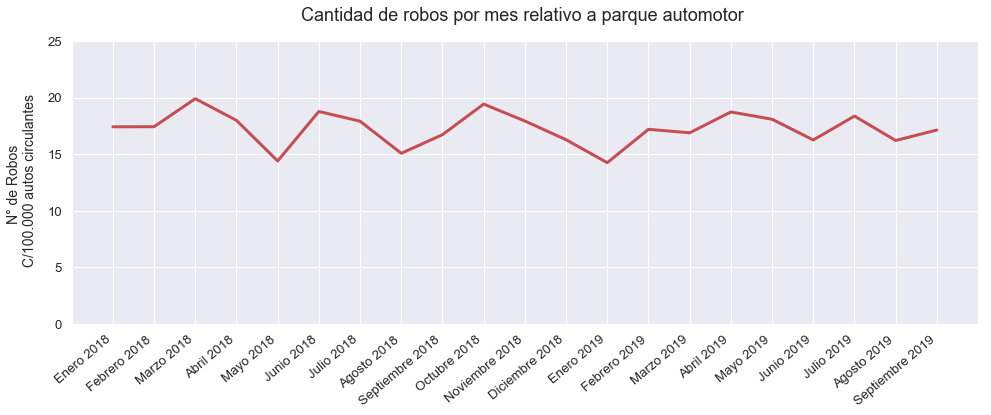

In [307]:
#Ploteo los robos relativizados a 100000 autos circulantes en función del mes del año
plt.figure(figsize = (14,6))
#ax = sns.barplot(robados_mes_parque_automotor["Mes"], robados_mes_parque_automotor['robos relativos'], palette = 'RdYlGn')
ax = sns.lineplot(x= robados_mes_parque_automotor["Mes"],y = robados_mes_parque_automotor['robos relativos'], linewidth=3, color = 'r')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(robados_mes_parque_automotor["Mes"], rotation=40, ha="right")
plt.title("Cantidad de robos por mes relativo a parque automotor ", pad = 20, fontsize= 18)
plt.xlabel('')
plt.ylabel('N° de Robos \n C/100.000 autos circulantes', labelpad= 10, fontsize= 14)
plt.ylim(0,25)
sns.despine()
plt.tight_layout()
plt.savefig('./figs/robos_por_mes.png', dpi= 300)

In [280]:
#convierto tramite fecha a tipo fecha, esta como objeto
recuperados["mes_idx"] = recuperados["tramite_fecha"].dt.month
recuperados["anio"] = recuperados["tramite_fecha"].dt.year

In [281]:
recuperados["mes"] = recuperados["mes_idx"].apply(lambda x: label_month(x))
recuperados["mes_anio"] = recuperados["mes"].astype(str).str.cat(recuperados["anio"].astype(str), sep =" ") 

In [282]:
#agrupo por los valores de los meses del año y cuento cada samples por cada valor
recuperados_mes_anio = pd.DataFrame(recuperados.groupby('mes_anio', sort=False).agg('count')['tramite_tipo'])

In [285]:
#Reseteo el index para sacar el mes de esa posición
recuperados_mes_anio = recuperados_mes_anio.reset_index()
recuperados_mes_anio.columns= ['Mes', 'recuperos']

In [287]:
# calculo tasa de recupero (como porcentaje de robados que fueron recuperados)
recuperados_mes_anio['relativo_a_robo_relativo'] = ((recuperados_mes_anio['recuperos'] / robados_mes_parque_automotor['robos']) * 100)

In [322]:
recuperados_mes_anio.head(2)

In [289]:
# Generar rolling mean (OPCIONAL)
#recuperados_mes_anio['rolling'] = recuperados_mes_anio['relativo_a_robo_relativo'].rolling(window= 6).mean()

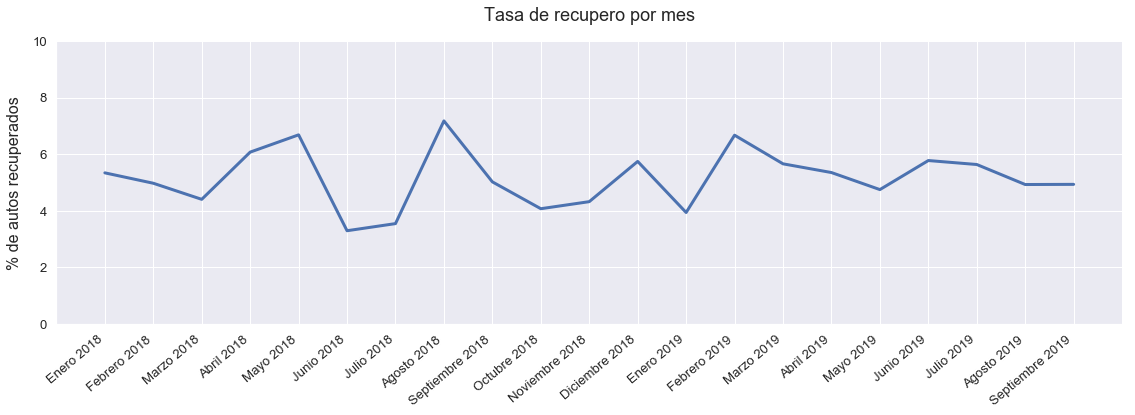

In [312]:
#Ploteo los robos relativizados a 100000 autos circulantes en función del mes del año
plt.figure(figsize = (16,6))
#ax = sns.barplot(recuperados_mes_anio["Mes"], recuperados_mes_anio['relativo_a_robo_relativo'])
ax = sns.lineplot(recuperados_mes_anio["Mes"], recuperados_mes_anio['relativo_a_robo_relativo'], linewidth=3, color = 'b')
#ax2 = sns.lineplot(recuperados_mes_anio["Mes"], recuperados_mes_anio['rolling'], ) # Rolling mean, ver si tiene sentido plotear
ax.set_xticklabels(robados_mes_parque_automotor["Mes"], rotation=40, ha="right")
plt.title("Tasa de recupero por mes", pad = 20, fontsize= 18)
plt.xlabel('')
plt.ylabel('% de autos recuperados', labelpad= 10, fontsize= 16)
plt.ylim(0,10)
sns.despine()
plt.tight_layout()
plt.savefig('./figs/recuperos_por_mes.png', dpi= 300)

### Robos por día de la semana

In [48]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["dia_semana_idx"] = robados["tramite_fecha"].dt.dayofweek

In [49]:
# Armo una función que codifique los días de la semana 
def label_weekday(day_code):
    if (day_code==0):
        return "Lunes"
    elif (day_code==1):
        return "Martes"
    elif (day_code==2):
        return "Miercoles"
    elif (day_code==3):
        return "Jueves"
    elif (day_code==4):
        return "Viernes"
    elif (day_code==5):
        return "Sabado"
    elif (day_code==6):
        return "Domingo"

In [50]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["dia_semana"] = robados["dia_semana_idx"].apply(lambda x: label_weekday(x))

In [137]:
# Generar un pequeño dataframe extra para el inset
finde = pd.DataFrame(robados['dia_semana'].value_counts().reset_index())
finde.columns = ['dia', 'robos']
finde = finde.iloc[5:7, :]

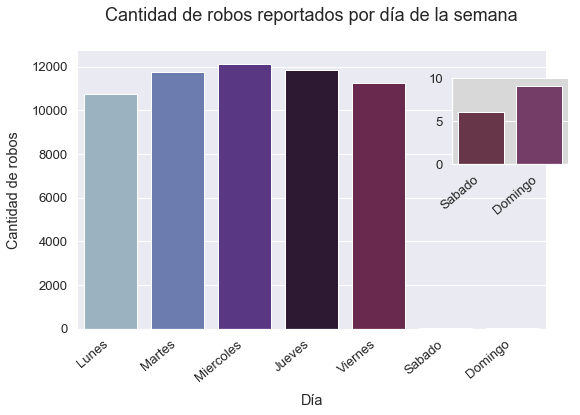

In [163]:
fig, ax1 = plt.subplots(figsize= (8,6))
ax1 = sns.countplot(x="dia_semana", data=robados,
                  order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], palette= 'twilight') #, palette="Set3"
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Día', labelpad= 10)
plt.ylabel('Cantidad de robos', labelpad= 10)
plt.title("Cantidad de robos reportados por día de la semana", pad= 30, size = 18)

ax2 = fig.add_axes([0.8, 0.6, 0.2, 0.2], facecolor= '#D8D8D8', alpha= 0.3)
sns.barplot(x= 'dia', y= 'robos', data= finde, order= ['Sabado', 'Domingo'], ax= ax2, palette= 'twilight_d')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('')
plt.ylabel('')
plt.ylim(0,10)
#plt.ylim(0,100)
sns.despine()
plt.tight_layout()
#plt.savefig('./figs/robos_xdia.png', dpi= 300)

In [123]:
# Creo una nueva columna en la que esté codificado el día de la de semana
recuperados["dia_semana_idx"] = recuperados["tramite_fecha"].dt.dayofweek
# Aplico la funcion a una nueva columna "dia_semana"
recuperados["dia_semana"] = recuperados["dia_semana_idx"].apply(lambda x: label_weekday(x))

In [138]:
# Generar un pequeño dataframe extra para el inset
finder = pd.DataFrame(recuperados['dia_semana'].value_counts().reset_index())
finder.columns = ['dia', 'recuperos']
finder = finder.append({'dia':'Domingo','recuperos': 0}, ignore_index = True)
finder = finder.iloc[5:7, :]

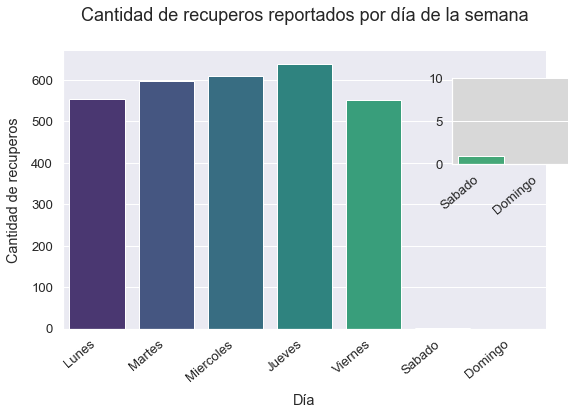

In [159]:
fig, ax1 = plt.subplots(figsize= (8,6))
sns.countplot(x="dia_semana", data=recuperados,
            order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], palette= 'viridis', ax= ax1) #, palette="Set3"
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Día', labelpad= 10)
plt.ylabel('Cantidad de recuperos', labelpad= 10)
plt.title("Cantidad de recuperos reportados por día de la semana", pad= 30, size = 18)

ax2 = fig.add_axes([0.8, 0.6, 0.2, 0.2], facecolor= '#D8D8D8', alpha= 0.3)
sns.barplot(x= 'dia', y= 'recuperos', data= finder, order= ['Sabado', 'Domingo'], ax= ax2, palette= 'viridis_r')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('')
plt.ylabel('')
plt.ylim(0,10)
#plt.ylim(0,100)
sns.despine()
plt.tight_layout()
#plt.savefig('./figs/recuperos_xdia.png', dpi= 300)

### Robos por marca

#### Absolutos

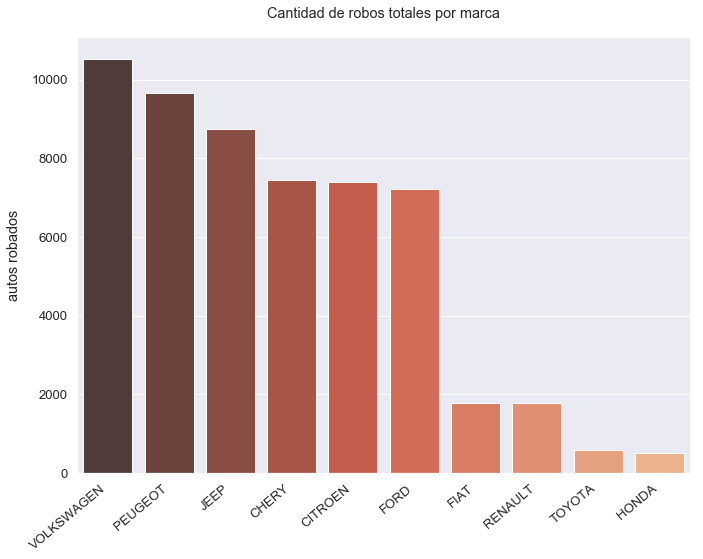

In [23]:
plt.figure(figsize = (10,8))
ax1 = sns.barplot(x= robados.automotor_marca_descripcion.value_counts()[0:10].index,
            y=robados.automotor_marca_descripcion.value_counts()[0:10], palette= 'OrRd_d')
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de robos totales por marca", pad = 20)
plt.ylabel('autos robados', labelpad= 10)
plt.xlabel('')
sns.despine()
plt.tight_layout()
#plt.savefig('./figs/robados_absolutos.svg', dpi= 300)

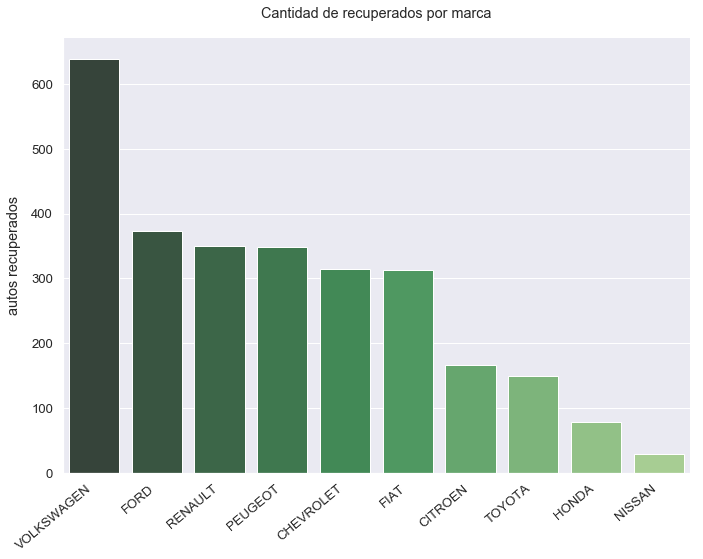

In [27]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x= recuperados.automotor_marca_descripcion.value_counts()[0:10].index,
            y=recuperados.automotor_marca_descripcion.value_counts()[0:10], palette= 'YlGn_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de recuperados por marca", pad = 20)
plt.ylabel('autos recuperados', labelpad= 10)
plt.xlabel('')
sns.despine()
plt.tight_layout()
#plt.savefig('./figs/recuperados_absolutos.svg', dpi= 300)

#### Relativos

In [8]:
# Robos relativos a patentamientos (calculo hecho a parte)
robos_relat = pd.read_csv('curados./robos_por_marca.csv')

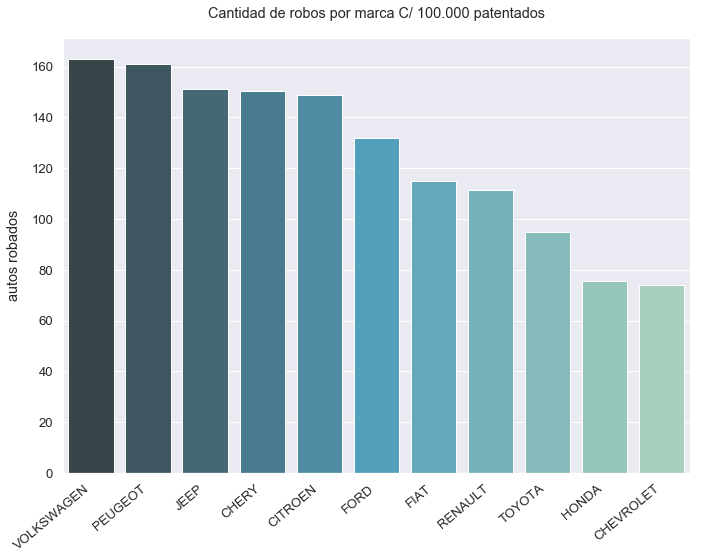

In [19]:
plt.figure(figsize = (10,8))
ax = sns.barplot(robos_relat.marca, robos_relat.rob_c_100m, palette= 'GnBu_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de robos por marca C/ 100.000 patentados", pad = 20)
plt.ylabel('autos robados', labelpad= 10)
plt.xlabel('')
plt.tight_layout()
#plt.savefig('./figs/robados_relativos.svg', dpi= 300)

### Robos por modelo

#### absolutos

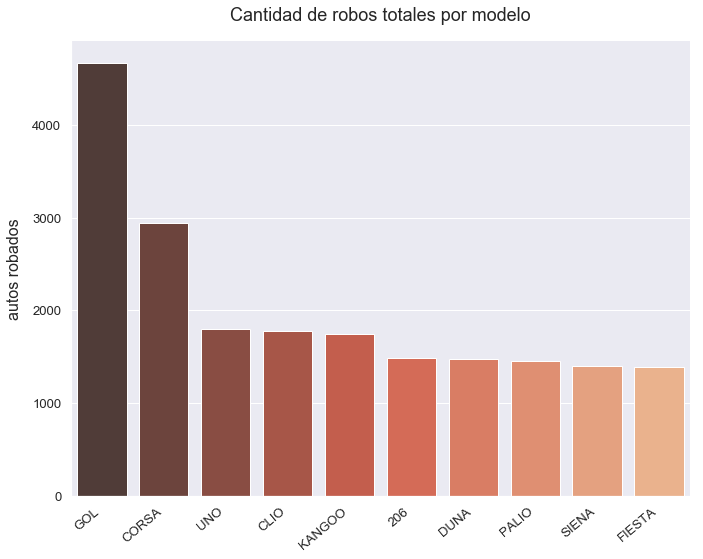

In [299]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x= robados.automotor_modelo_descripcion.value_counts()[0:10].index,
            y=robados.automotor_modelo_descripcion.value_counts()[0:10], palette= 'OrRd_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de robos totales por modelo", pad = 20, fontsize= 18)
plt.ylabel('autos robados', labelpad= 10, fontsize= 16)
plt.xlabel('')
sns.despine()
plt.tight_layout()
#plt.savefig('./figs/robados_absoluto_modelo.png', dpi= 300)

#### relativos

In [323]:
por_mod = pd.read_csv('./curados/robos_por_modelo.csv')

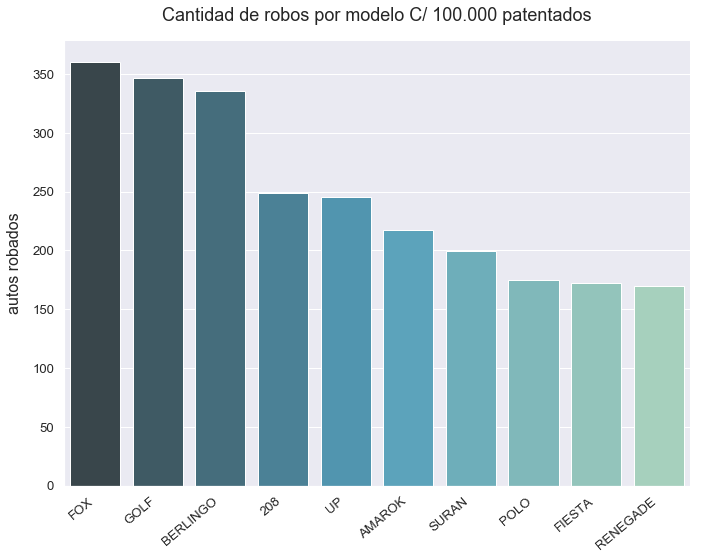

In [325]:
plt.figure(figsize = (10,8))
#fig, ax = plt.subplots()
ax = sns.barplot(por_mod.modelo[0:10], por_mod.rob_c_100m[0:10], palette= 'GnBu_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de robos por modelo C/ 100.000 patentados", pad = 20, fontsize = 18)
plt.ylabel('autos robados', labelpad= 10, fontsize= 16)
plt.xlabel('')
sns.despine()
plt.tight_layout()
#plt.savefig('./figs/robados_relativo_modelo.png', dpi= 300)

En este caso tenemos como dato todos los autos patentados en los años 2018 y 2019 que, si bien no son directamente la composición del parque automotor, nos dan una idea a grandes rasgos de la frecuencia relativa de cada uno de ellos. Por supuesto que este dato tiene claras limitaciones, por ejemplo, uno de los autos que más se encuentra en el parque automotor argentino es el Fiat Duna, sin embargo, no vamos a encontrar ninguna patentado en el período 2018-19.


### Robos por provincia

Text(0.5, 1.0, 'Cantidad de tramites (robos) por Provincia')

<Figure size 720x432 with 0 Axes>

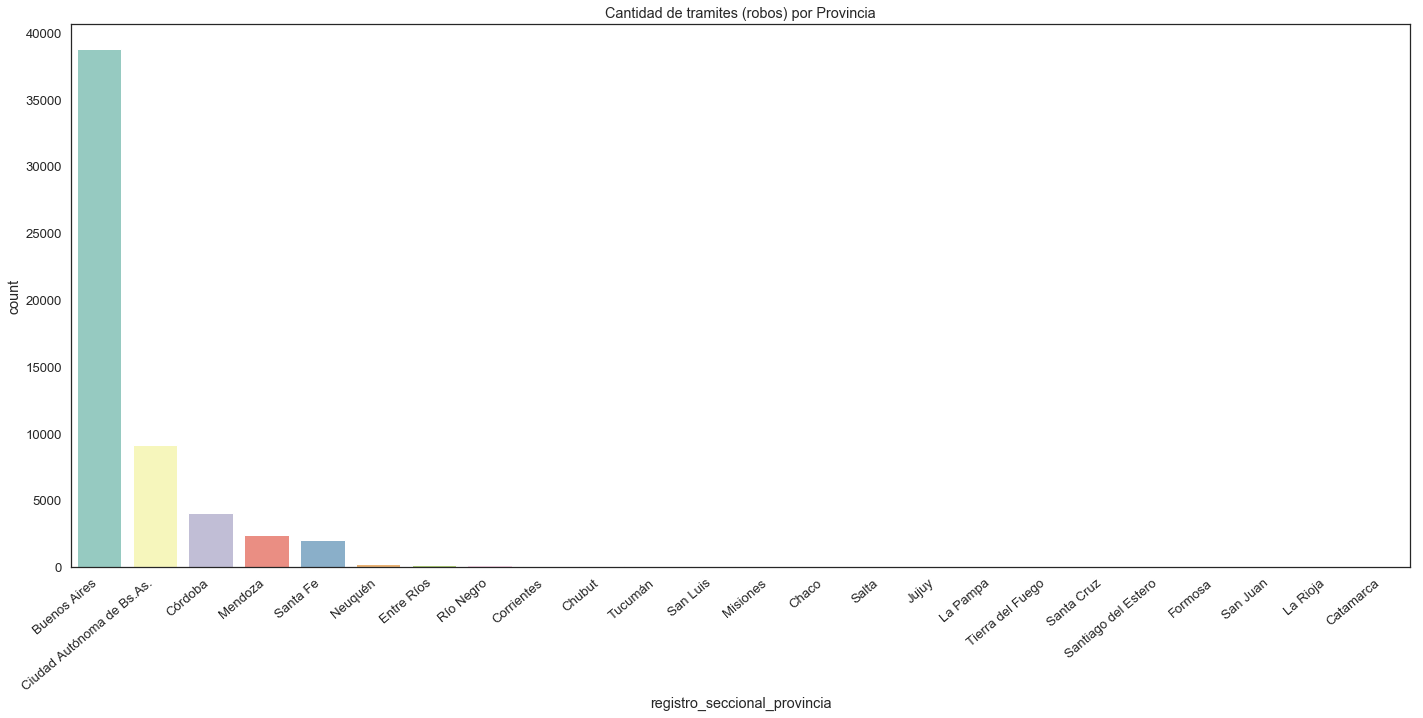

In [366]:
# Countplot de robos por provincia
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
#ax2 = fig.add_axes([0.7, 0.6, 0.2, 0.2])
ax = sns.countplot(x = "registro_seccional_provincia", 
                   data = robados, 
                   order = robados["registro_seccional_provincia"].value_counts().index,
                   palette = "Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax2 = sns.countplot(x = "registro_seccional_provincia", 
#                   data = robados, 
#                   order = robados["registro_seccional_provincia"].value_counts().index,
#                   palette = "Set3")

plt.title("Cantidad de tramites (robos) por Provincia")

In [34]:
# Calculo los robos y recuperos por provincia
robados_por_provincia = robados.groupby('registro_seccional_provincia').tramite_tipo.agg('count').to_frame().reset_index().rename(columns={"registro_seccional_provincia": "Provincia", "tramite_tipo": "robos"})
recuperados_por_provincia = recuperados.groupby('registro_seccional_provincia').tramite_tipo.agg('count').to_frame().reset_index().rename(columns={"registro_seccional_provincia": "Provincia", "tramite_tipo": "recupero"})

In [285]:
robados_por_provincia.head()

,Provincia,robos,Autos circulando,recupero,robos normalizado,log(robos normalizado),% recupero
0,Buenos Aires,38744.0,6171036,1363.0,627.836234,2.797846,3.517964
1,Catamarca,12.0,12108,2.0,99.108028,1.996109,16.666667
2,Chaco,53.0,266804,1.0,19.864770,1.298084,1.886792
3,Chubut,113.0,326559,13.0,34.603242,1.539117,11.504425
4,Ciudad Autónoma de Bs.As.,9131.0,1544318,1079.0,591.264234,2.771782,11.816888


In [35]:
# El parque automotor por provincia
autos_circulantes_1819 = pd.read_csv(r'./autos_circulantes_1819.csv', index_col = 0)
#[["Provincia", "Oct 2019"]].rename(columns={"Oct 2019": "Autos circulando"})

In [36]:
# Merge de robos por provincia y cantidad de autos por provincia
robados_por_provincia = robados_por_provincia.merge(autos_circulantes_1819, on='Provincia', how='outer')
robados_por_provincia = robados_por_provincia.merge(recuperados_por_provincia, on='Provincia', how='outer')

robados_por_provincia["robos normalizado"] = robados_por_provincia["robos"]/robados_por_provincia["Autos circulando"]*100000
robados_por_provincia['log(robos normalizado)'] = np.log10(robados_por_provincia['robos normalizado'])
robados_por_provincia['% recupero'] = robados_por_provincia['recupero'] / robados_por_provincia["robos"] * 100

In [37]:
# El shapefile que tiene todas las provincias
shapefile = './GEO/provincia/provincia.shp'
# Lo leo usando Geopandas
provincias = gpd.read_file(shapefile)[['fna', 'nam', 'geometry']]
# Le cambio el nombre a "Tierra del Fuego, Antártida e Islas del Atlántico sur" por "Tierra del Fuego"
provincias.nam[16] = "Tierra del Fuego"
provincias.nam[0] = "Ciudad Autónoma de Bs.As."

In [38]:
# Junto el geopandas con los poligionos de las provincias con los robos por provincia
provincias = provincias.merge(robados_por_provincia, left_on='nam', right_on="Provincia")

In [39]:
# El mapa me plotea la antartida y las islas asi que hago un rectangulo cortando solo el pais
shapefile = './GEO/AOI/AOI.shp'
# Read shapefile using Geopandas
AOI = gpd.read_file(shapefile)

In [40]:
# Construyo la intersección entre el rectángulo y el shapefile de las provincias
provincias_en_Argentina = gpd.overlay(provincias, AOI, how='intersection')
provincias_en_Argentina.head()

,fna,nam,Provincia,robos,Autos circulando,recupero,robos normalizado,log(robos normalizado),% recupero,id,Class,geometry
0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Bs.As.,Ciudad Autónoma de Bs.As.,9131.0,1544318,1079.0,591.264234,2.771782,11.816888,1,Argentina,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
1,Provincia del Neuquén,Neuquén,Neuquén,211.0,337698,26.0,62.481862,1.795754,12.322275,1,Argentina,"POLYGON Z ((-70.39345 -36.15526 0.00000, -70.3..."
2,Provincia de La Pampa,La Pampa,La Pampa,44.0,187708,2.0,23.440663,1.369970,4.545455,1,Argentina,"MULTIPOLYGON Z (((-64.46429 -35.00005 0.00000,..."
3,Provincia de Mendoza,Mendoza,Mendoza,2388.0,829747,62.0,287.798570,2.459089,2.596315,1,Argentina,"POLYGON Z ((-69.12570 -32.00283 0.00000, -69.1..."
4,Provincia de San Luis,San Luis,San Luis,76.0,197312,4.0,38.517678,1.585660,5.263158,1,Argentina,"POLYGON Z ((-67.05547 -31.85605 0.00000, -67.0..."


In [41]:
# Creo el colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=3))
sm._A = []

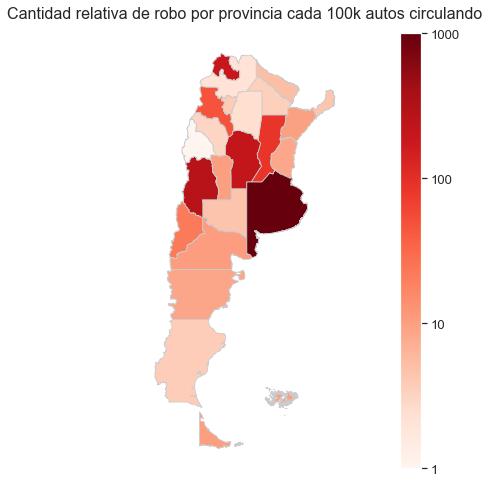

In [43]:
# Ploteo los robos relativos por provincia

# Tamaño de la figura
fig, ax = plt.subplots(1, figsize=(20, 8))
# Título
ax.set_title('Cantidad relativa de robo por provincia cada 100k autos circulando', fontdict={'fontsize': '16', 'fontweight' : '3'}, pad= 15)
# Borro los ejes
ax.axis('off')

cbar = fig.colorbar(sm, ticks=[0, 1, 2, 3], orientation='vertical')
cbar.ax.set_yticklabels([1, 10, 100, 1000])  # horizontal colorbar

# Plotea final
provincias_en_Argentina = provincias_en_Argentina.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
provincias_en_Argentina.plot(column='log(robos normalizado)', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
#plt.savefig('./figs/mapa_robos.png', dpi= 300)

In [44]:
scm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=20))
scm._A = []

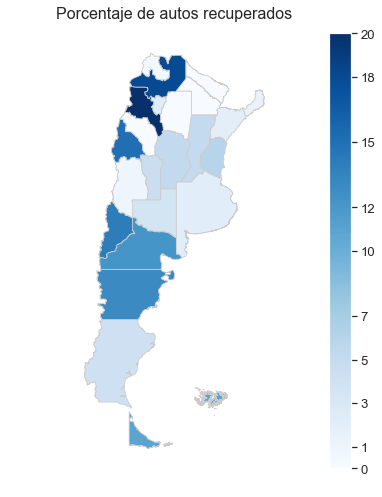

In [46]:
# Ploteo los robos relativos por provincia

# Tamaño de la figura
fig, ax = plt.subplots(1, figsize=(20, 8))
# Título
ax.set_title('Porcentaje de autos recuperados', fontdict={'fontsize': '16', 'fontweight' : '3'}, pad= 15)
# Borro los ejes
ax.axis('off')

cbar = fig.colorbar(scm, ticks= [0, 1, 3, 5, 7, 10, 12, 15, 18, 20], orientation='vertical')# ticks=[0, 1, 2, 3]
cbar.ax.set_yticklabels([0, 1, 3, 5, 7, 10, 12, 15, 18, 20])  # horizontal colorbar

# Plotea final
provincias_en_Argentina = provincias_en_Argentina.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
provincias_en_Argentina.plot(column='% recupero', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#plt.savefig('./figs/mapa_recuperos.png', dpi= 300)
# HAY ALGO RARO CON CATAMARCA, CHECKEAR

### Recuperados

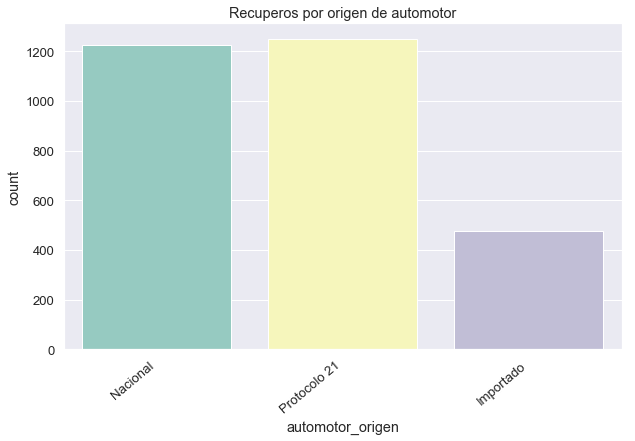

In [337]:
#Vemos la cantidad de autos recuperados en función del origen del mismo
plt.figure(figsize=(10,6))
ax = sns.countplot(x="automotor_origen", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por origen de automotor")
plt.show()

Text(0.5, 1.0, 'Recuperos por año modelo')

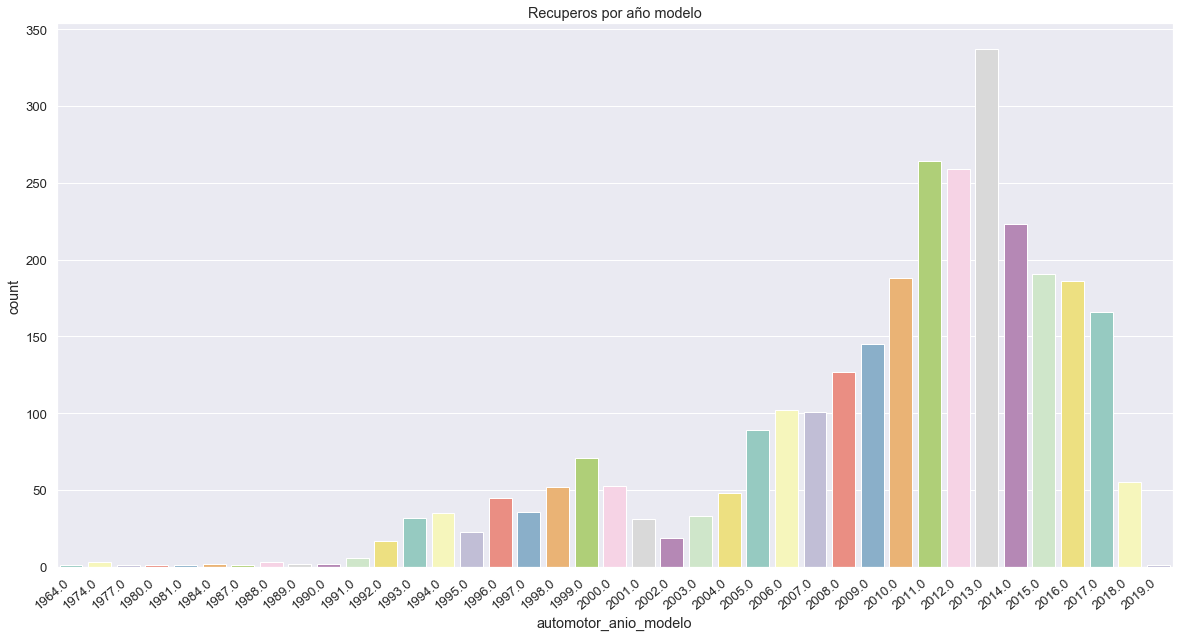

In [338]:
# Recuperados por año de fabricación del auto
plt.figure(figsize=(20,10))
ax = sns.countplot(x="automotor_anio_modelo", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por año modelo")

In [346]:
#Vamos a comparar los recuperados por anio de modelo en relación a los robados totales de ese anio de modelo
# genero los dataframes con el conteo de valores
robados_anio_count = pd.DataFrame(robados['automotor_anio_modelo'].value_counts())
recuperados_anio_count = pd.DataFrame(recuperados['automotor_anio_modelo'].value_counts())
robados_anio_count.columns = ['total_robados_anio_modelo']
recuperados_anio_count.columns = ['total_recuperados_anio_modelo']

In [347]:
# Unifico los dataframes para poder comparar los valores
robos_recuperos_anio_modelo = pd.merge(robados_anio_count, recuperados_anio_count, left_index=True, right_index=True, how='outer')
robos_recuperos_anio_modelo.fillna(0, inplace=True)

In [ ]:
#robos_recuperos_anio_modelo = pd.DataFrame(robos_recuperos_anio_modelo)

In [348]:
robos_recuperos_anio_modelo['anio_modelo'] = robos_recuperos_anio_modelo.index
#tiramos el index viejo, metemos uno nuevo y el viejo lo igualamos a una columna que inventamos
robos_recuperos_anio_modelo = robos_recuperos_anio_modelo.reset_index(drop=True)
robos_recuperos_anio_modelo = robos_recuperos_anio_modelo.iloc[1:]

In [352]:
robos_recuperos_anio_modelo['recuperados_relativo_robo'] = robos_recuperos_anio_modelo['total_recuperados_anio_modelo'] / robos_recuperos_anio_modelo['total_robados_anio_modelo']

In [353]:
robos_recuperos_anio_modelo.columns

Index(['total_robados_anio_modelo', 'total_recuperados_anio_modelo',
       'anio_modelo', 'recuperados_relativo_robo'],
      dtype='object')

In [354]:
anio_modelo_list = list(robos_recuperos_anio_modelo['anio_modelo'])
recuperados_relativo_robo_list = list(robos_recuperos_anio_modelo['recuperados_relativo_robo'])
tasa_sobre_robo = list(robos_recuperos_anio_modelo['recuperados_relativo_robo']/robos_recuperos_anio_modelo['total_robados_anio_modelo'])
tasa_por_robo = list(1/(robos_recuperos_anio_modelo['recuperados_relativo_robo']/robos_recuperos_anio_modelo['total_robados_anio_modelo']))

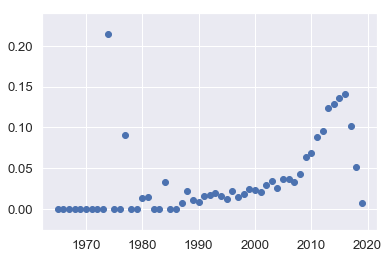

In [355]:
#Vemos la tasa de recupero por año de modelo del auto
plt.scatter(anio_modelo_list,recuperados_relativo_robo_list)
plt.show()

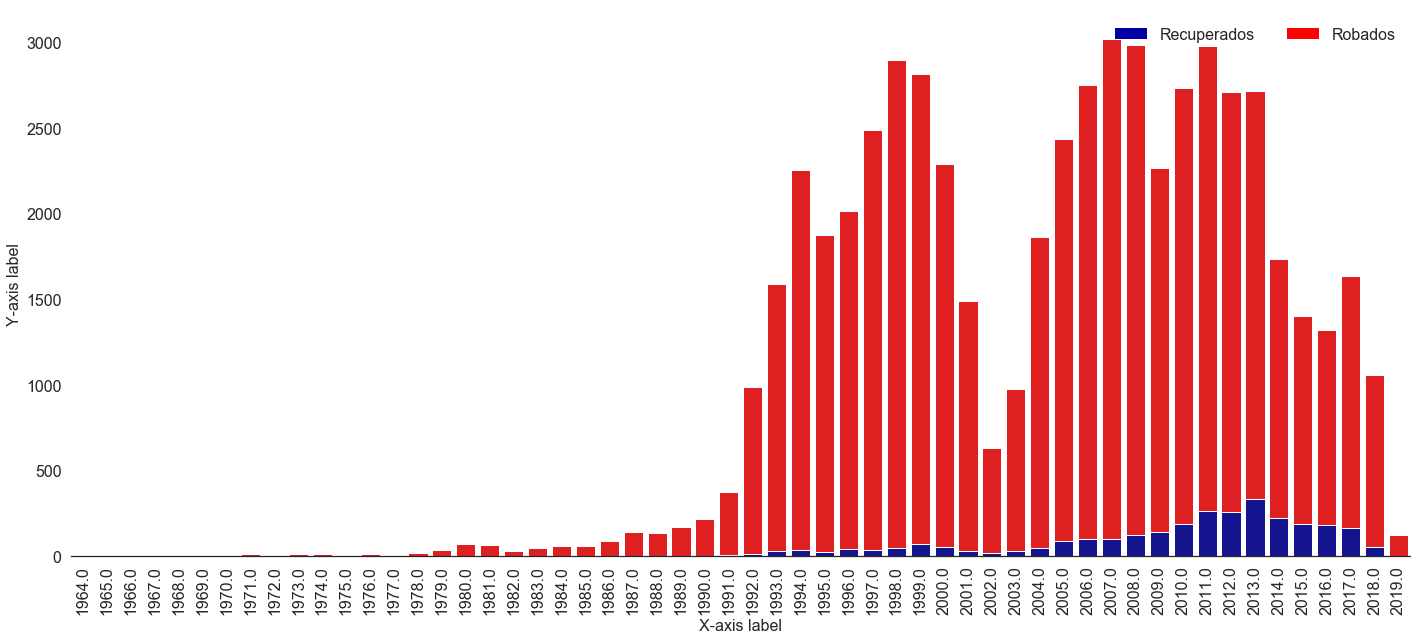

In [357]:
#Vemos cuanto se recupero en relación al robo de cada año de modelo de auto.

sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_robados_anio_modelo, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_recuperados_anio_modelo, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Recuperados', 'Robados'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
plt.xticks(rotation=90)
sns.despine(left=True) 
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

### Por edad

In [165]:
# Generar columna con la edad del titular al momento del robo
robados['edad'] = robados['tramite_fecha'].dt.year - robados['titular_anio_nacimiento']

In [176]:
# Importar df de edades de patentados (hecho a parte a partir de patentados)
edades_pats = pd.read_csv('./accesorios/edades_pats.csv')

In [168]:
# Generar columna con la edad del titular al momento del recupero
recuperados['edad'] = recuperados['tramite_fecha'].dt.year - recuperados['titular_anio_nacimiento']

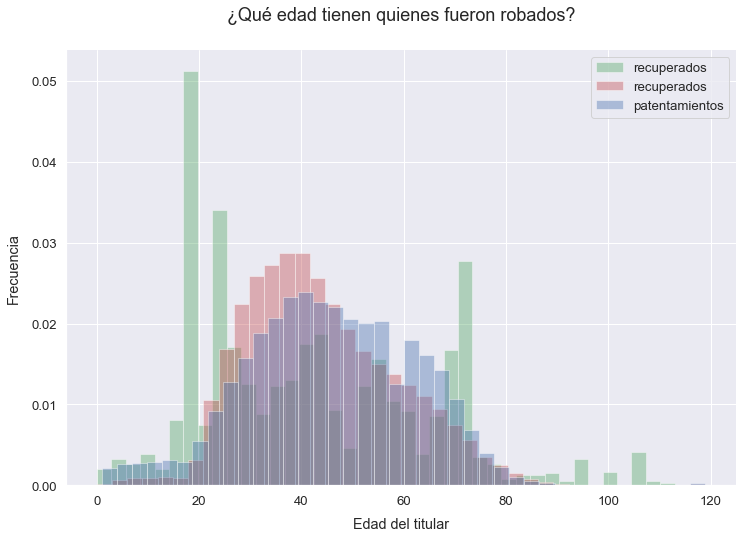

In [233]:
plt.figure(figsize= (12,8))
sns.distplot(recuperados['edad'], kde= False, bins= 40, color= 'g', norm_hist= True, label= 'recuperados')
sns.distplot(robados['edad'], kde= False, bins= 40, color= 'r', norm_hist= True, label= 'recuperados')
sns.distplot(edades_pats['edad'], kde= False, bins= 40, color= 'b', norm_hist= True, label= 'patentamientos')
plt.legend()
plt.ylabel('Frecuencia', labelpad= 10)
plt.xlabel('Edad del titular', labelpad=10)
plt.title("¿Qué edad tienen quienes fueron robados?", pad= 30, size = 18)
sns.despine()